In [3]:
# importing numpy

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [83]:
# 1. Basic Line Plotting
# Reproduce this image, showing river flow during flood years of the Merrimack River
# The data used to create this plot can be found un t. You may read in the data any way you want. That is, you may extract 
# the data for the years in question by hand, however part of your grade will be based on creating a flexible script that could 
# read in values from another datafile, e.g., from another river gauge. Pay attention to detail.

# unt = np.loadtxt('merrimack_discharge.dat.txt', skiprows=25, usecols = (1,2,3))


unt = open('merrimack_discharge.dat.txt')
unt.readlines()

# Undergraduates: Focus only on the four lines representing river flow in the four specific years (1936, 1938, 1960, 1987).
# Graduates: Do the undergrad work, and then add the black line representing the mean discharge (calculated from the data in 
# the file), and the shaded region representing one standard deviation from the mean.

['#\n',
 '# U.S. Geological Survey\n',
 '# National Water Information System\n',
 '# Retrieved: 2006-04-20 12:52:53 EDT\n',
 '#\n',
 '# This file contains published daily mean streamflow data.\n',
 '#\n',
 '# Further Descriptions of the dv_cd column can be found at:\n',
 '# http://waterdata.usgs.gov/nwis/help?codes_help#dv_cd\n',
 '#\n',
 '#\n',
 '# This information includes the following fields:\n',
 '#\n',
 '#  agency_cd   Agency Code\n',
 '#  site_no     USGS station number\n',
 '#  dv_dt       date of daily mean streamflow\n',
 '#  dv_va       daily mean streamflow value, in cubic-feet per-second\n',
 '#  dv_cd       daily mean streamflow value qualification code\n',
 '#\n',
 '# Sites in this file include:\n',
 '#  USGS 01100000 MERRIMACK RIVER BL CONCORD RIVER AT LOWELL, MA\n',
 '#\n',
 '#\n',
 'agency_cd\tsite_no\tdv_dt\tdv_va\tdv_cd\n',
 '5s\t15s\t10d\t12n\t3s\n',
 'USGS\t01100000\t1923-06-01\t4800\t\n',
 'USGS\t01100000\t1923-06-02\t3490\t\n',
 'USGS\t01100000\t1923-06-03\t2880

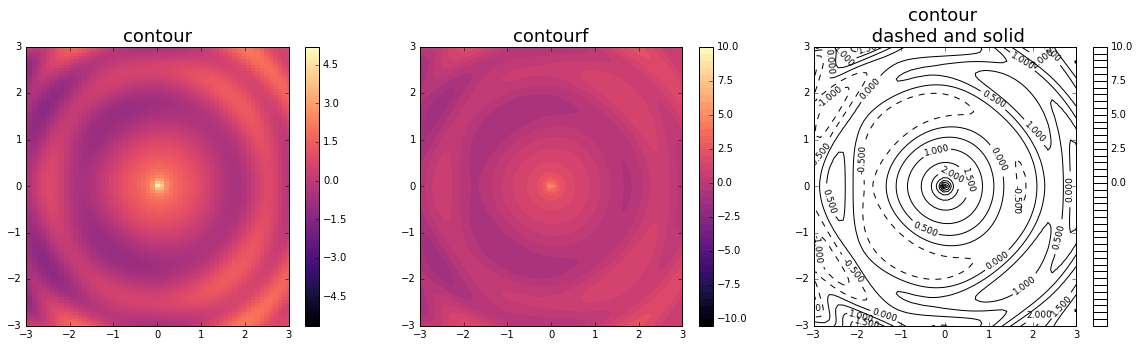

In [104]:
# 2. Plot 2D function multiple ways

# Use this code to define a set of gridded data, defined between -3 and 3 in both x and y.

X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)
levels = np.arange(-10.5,10.5,.5)


# Create three different plots of Z over the X-Y plane. Use:
# pcolor
# contourf
## contour (with dashed lines for negative values, solid lines for positive values)
## Make sure the aspect ratio is 1.

fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1, 3, 1)
ax.set_xlim(-3, 3)   # defined between -3 and 3 in both x and y
ax.set_ylim(-3, 3)
ax.set_title('contour', fontsize=18)
plot = ax.pcolor(X, Y, Z, cmap='magma')  # use the magma colormap 
fig.colorbar(plot)

ax2 = fig.add_subplot(1, 3, 2)
ax2.set_xlim(-3, 3)   # defined between -3 and 3 in both x and y
ax2.set_ylim(-3, 3)
ax2.set_title('contourf', fontsize=18)
plot = ax2.contourf(X, Y, Z, cmap='magma', levels=levels)  # use the magma colormap
fig.colorbar(plot)

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_xlim(-3, 3)   # defined between -3 and 3 in both x and y
ax3.set_ylim(-3, 3)
ax3.set_title('contour \n dashed and solid', fontsize=18)
plt.rcParams['contour.negative_linestyle'] = 'dashed'
plot = plt.contour(X, Y, Z, colors='black', levels=levels)
plt.clabel(plot, fontsize=9, inline=1)
fig.colorbar(plot)

# ??????????????????????????????????????????????????????????????????

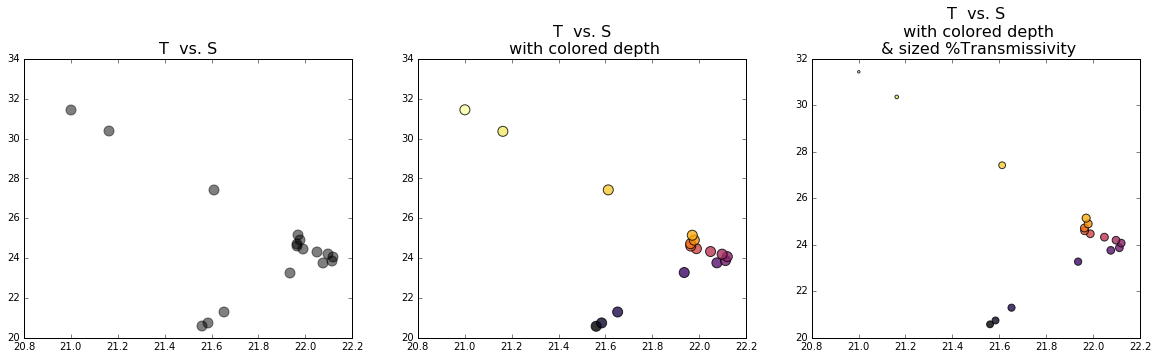

In [139]:
# 3. Read 2D data and make scatter plot

# Temperature and salinity are known to have an important relationship in oceanography. Investigate that relationship in the CTD 
# data from one of the files stored in data/MCH. Read in the data and make the following plots as subplots in one figure:
# plot temperature vs. salinity, using black dots to mark the data points.
# plot temperature vs. salinity, and color the markers with the depth;
# plot temperature vs. salinity, color the markers with the depth, and then size the markers 
# with another property of your choice from the file.
# Choose a colormap that is different from the default to use for the colors of your markers for the 2nd and 3rd plots.

data = np.loadtxt('m1001a.cnv2', comments='*', skiprows=45)

temp = data[:,2]
salt = data[:,5]
depth = data[:,1]
trans = data[:,9]

fig = plt.figure(figsize=(20,5))

# ax = fig.add_subplot(1, 3, 1)
# ax.set_title('temperature  vs. salinity', fontsize=16)
# ax.plot(temp, salt, 'k.', markersize=20) 

ax = fig.add_subplot(1, 3, 1)
ax.set_title('T  vs. S', fontsize=16)
plot1 = ax.scatter(temp, salt, s=100, c='k', alpha=0.5)  
# fig.colorbar(plot1)

ax = fig.add_subplot(1, 3, 2)
ax.set_title('T  vs. S\n with colored depth', fontsize=16)
plot2 = ax.scatter(temp, salt, s=100, c=depth, cmap='inferno' , alpha=0.8)  
# fig.colorbar(plot2)

ax = fig.add_subplot(1, 3, 3)
ax.set_title('T  vs. S\n with colored depth\n & sized %Transmissivity', fontsize=16)
plot3 = ax.scatter(temp, salt, s=trans, c=depth, cmap='inferno' , alpha=0.8) 
# fig.colorbar(plot3)

In [138]:
ax.scatter?

# Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, 
# Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, 
# Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, 
# Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, 
# Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, 
# YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm,
# coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, 
# gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot,
# gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, 
# nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, 
# seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, 
# winter_r

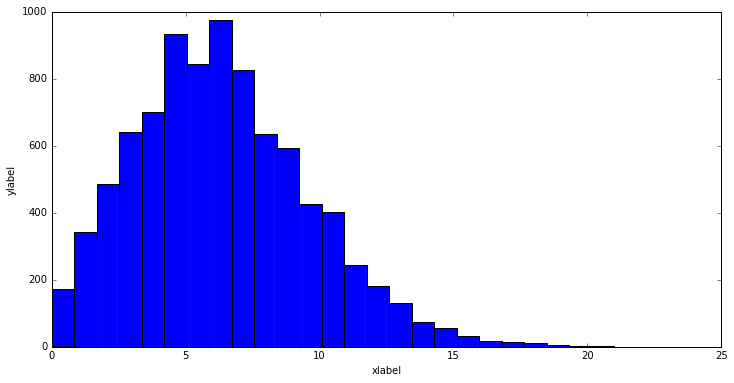

In [115]:
# 4. Histogram
# Make a 1D histogram of wind speed from the BURL1 NOAA weather station. Load the data like this:
burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
wind_speed = burl[:, 6]
 
# making 1D histogram of wind speed
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(wind_speed, bins=25)
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')


# Bonus: What kind of probability distribution does this look like? Plot your best guess on top of the histogram using a line.

# This is a right skewed distribtion

# import scipy.stats as stats

# maxwell = stats.maxwell
# data = maxwell.rvs(loc=0, scale=5, size=10000)

# params = maxwell.fit(data, floc=0)

# plt.plot(wind_speed, maxwell.pdf(wind_speed), lw=3)
# plt.show()

In [17]:
maxwell.rvs?

In [28]:
# 5. (Grad) Fit and line and plot
# Load in the Mauna Loa carbon dioxide dataset:
mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
# years = mauna_loa_co2[:, 0]
# months = mauna_loa_co2[:, 1]
# co2 = mauna_loa_co2[:, 4]

# trying to combine the months of the year to each year...
from datetime import datetime
# date = np.append(years, months)

# datetimes = []
years = mauna_loa_co2[:, 0]
months = mauna_loa_co2[:, 1]
co2 = mauna_loa_co2[:, 4]      
# datetimes.append(datetime(years, months))

datetimes = datetime(years, months)
            
    

# Fit a 1st (straight line), 2nd, and 5th order polynomial to the data. Use your polynomial fits to predict CO2 in the year 2100. 
# Which prediction do you think is most accurate?

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)  
ax.plot(datetimes, co2)
ax.set_xlabel('Time [years... how do I do years & months?]', fontsize=14) # how do you combine months and years again??
ax.set_ylabel('CO$_2$ [ppm]', fontsize=14)
ax.set_title('CO$_2$ Trend', fontsize=16)

TypeError: only length-1 arrays can be converted to Python scalars

In [26]:
# 6. (Grad) Make a movie
# ffmpeg
# look for something like homebrew for mac... find a pacakge for this to find ffmpeg
# do your zipped up images(just one) and animations

# load file
lon, lat, mean_surf_temp = np.load('..\python4geosciences\data\surface_temp_predictions.npz', encoding='latin1')['arr_0']